## Import des librairies ##

In [121]:
#Imports librairies de base
import numpy as np
import pandas as pd

#Affichage de Graphes
from IPython.display import Markdown, display, HTML
import matplotlib.pyplot as plt

#Information Mutuelle
from sklearn.feature_selection import mutual_info_regression

from google.colab import files
data_to_load = files.upload()

Saving passagers.csv to passagers (2).csv
Saving test.csv to test (2).csv


## 1. Lecture des données ##

1.1 Charger les données d'apprentissage (Data/passagers.csv) dans un DataFrame nommé train. Afficher 10 exemples.

In [122]:
train = pd.read_csv("passagers.csv")
train.sample(10, random_state=42)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
290,291,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S
300,301,1,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,NaN,0,0,9234,7.7500,NaN,Q
333,334,0,3,"Vander Planke, Mr. Leo Edmondus",male,16.0,2,0,345764,18.0000,NaN,S
208,209,1,3,"Carr, Miss. Helen ""Ellen""",female,16.0,0,0,367231,7.7500,NaN,Q
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S


1.2 Charger les données d'apprentissage (Data/test.csv) dans un Dataframe nommé test. Afficher 10 exemples.

In [123]:
test = pd.read_csv("test.csv")
test.sample(10, random_state=42)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
321,1213,3,"Krekorian, Mr. Neshan",male,25.0,0,0,2654,7.2292,F E57,C
324,1216,1,"Kreuchen, Miss. Emilie",female,39.0,0,0,24160,211.3375,NaN,S
388,1280,3,"Canavan, Mr. Patrick",male,21.0,0,0,364858,7.7500,NaN,Q
56,948,3,"Cor, Mr. Bartol",male,35.0,0,0,349230,7.8958,NaN,S
153,1045,3,"Klasen, Mrs. (Hulda Kristina Eugenia Lofqvist)",female,36.0,0,2,350405,12.1833,NaN,S
30,922,2,"Louch, Mr. Charles Alexander",male,50.0,1,0,SC/AH 3085,26.0000,NaN,S
72,964,3,"Nieminen, Miss. Manta Josefina",female,29.0,0,0,3101297,7.9250,NaN,S
82,974,1,"Case, Mr. Howard Brown",male,49.0,0,0,19924,26.0000,NaN,S
258,1150,2,"Bentham, Miss. Lilian W",female,19.0,0,0,28404,13.0000,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


1.3 Afficher les informations des deux DataFrames train et Test.

In [124]:
train = pd.read_csv("passagers.csv")
test = pd.read_csv("test.csv")

print("=== Informations sur le DataFrame train ===")
train.info()
print("\n=== Informations sur le DataFrame test ===")
test.info()

=== Informations sur le DataFrame train ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

=== Informations sur le DataFrame test ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ----

1.4 Calculer le taux global de survie

In [125]:
taux_survie = train["Survived"].mean() * 100
print(f"Taux global de survie : {taux_survie:.2f}%")

Taux global de survie : 38.38%


#### Question 1 : Quel Travail voyez-vous pour que les données soient prêtes à faire tourner dans un modèle ?
Identifier les valeurs manquantes (NaN). Supprimer ou imputer ces valeurs (moyenne, médiane, ou catégorie la plus fréquente). Corriger les incohérences (âge négatif, doublons, etc.).


#### Question 2 : Quelle différence y-a-t'il entre les données train et les données test ?
train contient une colonne supplémentaire : Survived (la variable cible, indiquant si le passager a survécu ou non). test est utilisé pour évaluer les performances du modèle, car il ne contient pas la variable cible. Le but est de prédire Survived pour ces passagers.


#### Question 3 : Quel est le rôle de ces deux sets de données ?
train nous permet d'évaluer et test nous permet de faire des modifications puis de comparer avec train qui possède des données réelles.



## 2. Analyse des features

2.1 Analyser l'effet de la variable Classe sur le taux de survie, en affichant le % de survie par classe

In [126]:
survival_by_class = train.groupby('Pclass')['Survived'].agg(['mean', 'count'])

survival_by_class['mean'] = survival_by_class['mean'] * 100

survival_by_class.rename(
    columns={'mean': 'Survival Rate (%)', 'count': 'Number of Passengers'},
    inplace=True
)

survival_by_class

,Survival Rate (%),Number of Passengers
Pclass,,
1,62.962963,216
2,47.282609,184
3,24.236253,491


2.2 Analyser l'effet de la variable Genre (Sex) sur le taux de survie, en affichant le % de survie par classe

In [127]:
survival_by_sex_class = train.groupby(['Sex', 'Pclass'])['Survived'].agg(['mean', 'count'])

survival_by_sex_class['mean'] = survival_by_sex_class['mean'] * 100

survival_by_sex_class.rename(
    columns={'mean': 'Survival Rate (%)', 'count': 'Number of Passengers'},
    inplace=True
)

survival_by_sex_class = survival_by_sex_class.reset_index()
survival_by_sex_class

,Sex,Pclass,Survival Rate (%),Number of Passengers
0,female,1,96.808511,94
1,female,2,92.105263,76
2,female,3,50.000000,144
3,male,1,36.885246,122
4,male,2,15.740741,108
5,male,3,13.544669,347


2.3 Calculer une nouvelle colonne FamilySize contenant la taille de la famille, pour les DataFrame train et Test. Afficher pour 10 exemples l'Id du passager, le nom, l'age, le sexe et la taille de la famille.

In [128]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

train_examples = train[['PassengerId', 'Name', 'Age', 'Sex', 'FamilySize']].sample(10, random_state=42)
print("Exemples pour train :")
print(train_examples)

test_examples = test[['PassengerId', 'Name', 'Age', 'Sex', 'FamilySize']].sample(10, random_state=42)
print("\nExemples pour test :")
print(test_examples)

Exemples pour train :
     PassengerId                                               Name   Age  \
709          710  Moubarek, Master. Halim Gonios ("William George")   NaN   
439          440             Kvillner, Mr. Johan Henrik Johannesson  31.0   
840          841                        Alhomaki, Mr. Ilmari Rudolf  20.0   
720          721                  Harper, Miss. Annie Jessie "Nina"   6.0   
39            40                        Nicola-Yarred, Miss. Jamila  14.0   
290          291                       Barber, Miss. Ellen "Nellie"  26.0   
300          301           Kelly, Miss. Anna Katherine "Annie Kate"   NaN   
333          334                    Vander Planke, Mr. Leo Edmondus  16.0   
208          209                          Carr, Miss. Helen "Ellen"  16.0   
136          137                       Newsom, Miss. Helen Monypeny  19.0   

        Sex  FamilySize  
709    male           3  
439    male           1  
840    male           1  
720  female           2  


2.4 Visualisez le nombre de personnes et le taux de survie par taille de famille.

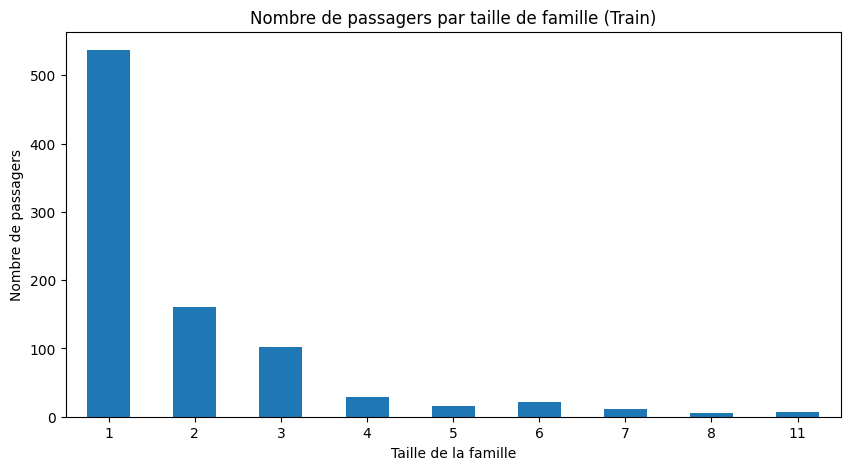

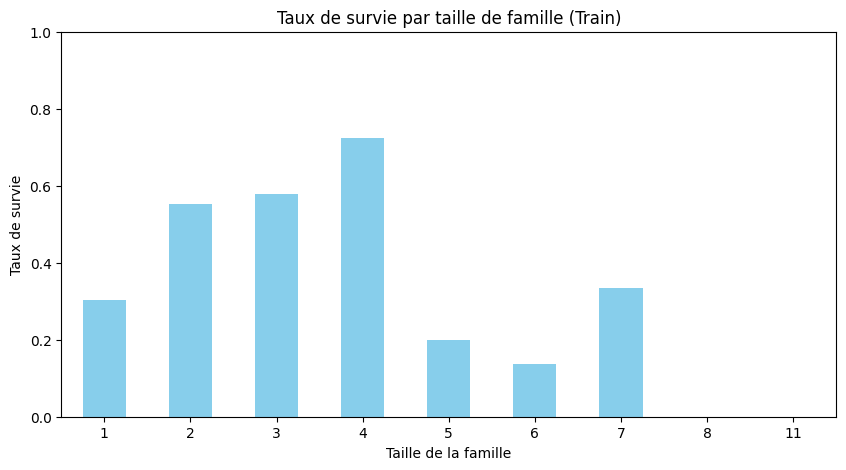

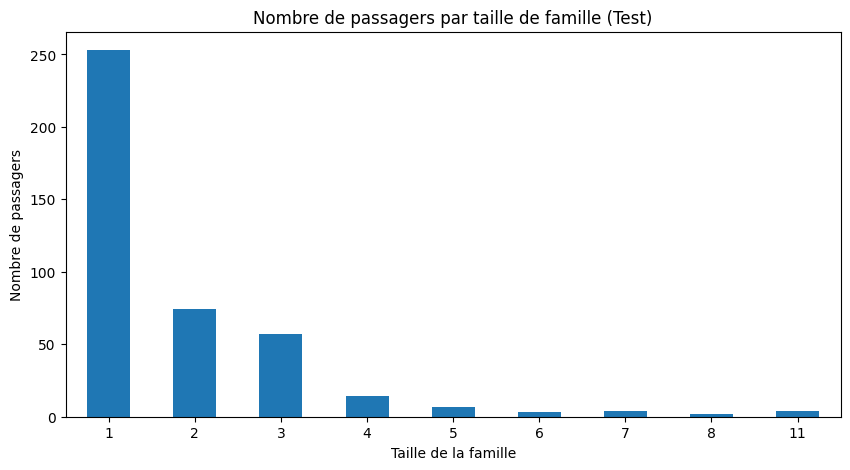

In [129]:
plt.figure(figsize=(10, 5))
train['FamilySize'].value_counts().sort_index().plot(kind='bar')
plt.title('Nombre de passagers par taille de famille (Train)')
plt.xlabel('Taille de la famille')
plt.ylabel('Nombre de passagers')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(10, 5))
train.groupby('FamilySize')['Survived'].mean().plot(kind='bar', color='skyblue')
plt.title('Taux de survie par taille de famille (Train)')
plt.xlabel('Taille de la famille')
plt.ylabel('Taux de survie')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(10, 5))
test['FamilySize'].value_counts().sort_index().plot(kind='bar')
plt.title('Nombre de passagers par taille de famille (Test)')
plt.xlabel('Taille de la famille')
plt.ylabel('Nombre de passagers')
plt.xticks(rotation=0)
plt.show()

2.5 Calculer une nouvelle colonne IsAlone indiquant si le passager est seul ou pas, pour les DataFrame train et Test. Afficher pour 10 exemples l'Id du passager, le nom, l'age, le sexe et le status IsAlone.

In [130]:
train['IsAlone'] = (train['FamilySize'] == 1).astype(int)

test['IsAlone'] = (test['FamilySize'] == 1).astype(int)

train_alone_examples = train[['PassengerId', 'Name', 'Age', 'Sex', 'IsAlone']].sample(10, random_state=42)
print("Exemples pour train avec IsAlone :")
print(train_alone_examples)

test_alone_examples = test[['PassengerId', 'Name', 'Age', 'Sex', 'IsAlone']].sample(10, random_state=42)
print("\nExemples pour test avec IsAlone :")
print(test_alone_examples)

Exemples pour train avec IsAlone :
     PassengerId                                               Name   Age  \
709          710  Moubarek, Master. Halim Gonios ("William George")   NaN   
439          440             Kvillner, Mr. Johan Henrik Johannesson  31.0   
840          841                        Alhomaki, Mr. Ilmari Rudolf  20.0   
720          721                  Harper, Miss. Annie Jessie "Nina"   6.0   
39            40                        Nicola-Yarred, Miss. Jamila  14.0   
290          291                       Barber, Miss. Ellen "Nellie"  26.0   
300          301           Kelly, Miss. Anna Katherine "Annie Kate"   NaN   
333          334                    Vander Planke, Mr. Leo Edmondus  16.0   
208          209                          Carr, Miss. Helen "Ellen"  16.0   
136          137                       Newsom, Miss. Helen Monypeny  19.0   

        Sex  IsAlone  
709    male        0  
439    male        1  
840    male        1  
720  female        0  
39

2.6 Visualisez le nombre de personnes et le taux de survie par statut seul ou pas.

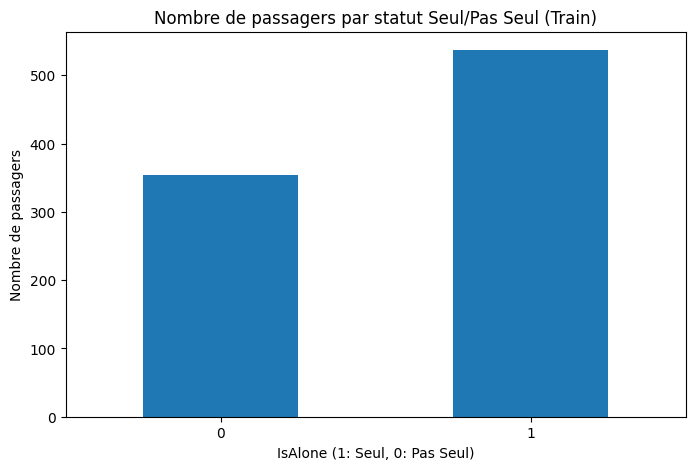

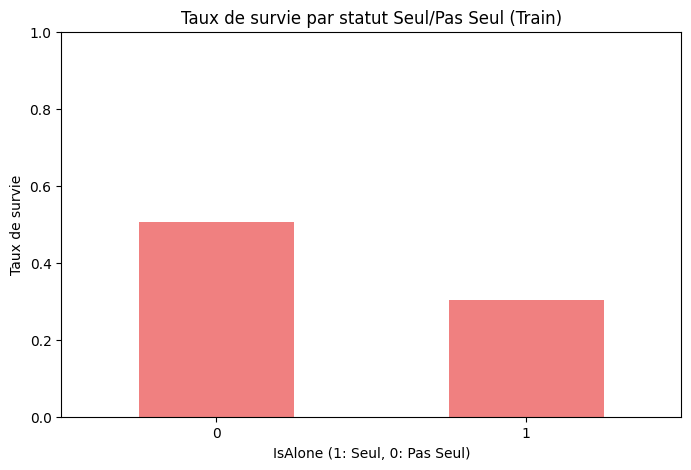

In [131]:
plt.figure(figsize=(8, 5))
train['IsAlone'].value_counts().sort_index().plot(kind='bar')
plt.title('Nombre de passagers par statut Seul/Pas Seul (Train)')
plt.xlabel('IsAlone (1: Seul, 0: Pas Seul)')
plt.ylabel('Nombre de passagers')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(8, 5))
train.groupby('IsAlone')['Survived'].mean().plot(kind='bar', color='lightcoral')
plt.title('Taux de survie par statut Seul/Pas Seul (Train)')
plt.xlabel('IsAlone (1: Seul, 0: Pas Seul)')
plt.ylabel('Taux de survie')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()

2.7 Calculer l'information mutuelle sur les données train.

Attention : Il y a des données continues et des données discrètes

Ignorer les colonnes Name, Ticket et Cabin

In [132]:
X = train.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train['Survived']

X_encoded = X.copy()

X_encoded['Embarked'] = X_encoded['Embarked'].fillna(X_encoded['Embarked'].mode()[0])

X_encoded = pd.get_dummies(X_encoded, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

cols_to_use_for_mi = [col for col in X_encoded.columns if col not in ['Name', 'Ticket', 'Cabin']]

X_mi = X_encoded[cols_to_use_for_mi]

for col in ['Age', 'Fare']:
    if col in X_mi.columns:
        X_mi[col] = X_mi[col].fillna(X_mi[col].median())

discrete_features = [col for col in X_mi.columns if col not in ['Age', 'Fare']]

mi_scores = mutual_info_regression(X_mi, y, discrete_features='auto', random_state=42)

mi_scores = pd.Series(mi_scores, name="Mutual Information Scores", index=X_mi.columns)
mi_scores = mi_scores.sort_values(ascending=False)

print("Scores d'information mutuelle :")
print(mi_scores)

Scores d'information mutuelle :
Sex_male       0.156138
Fare           0.143200
FamilySize     0.051420
Parch          0.042599
Embarked_Q     0.023474
IsAlone        0.022122
PassengerId    0.016483
Pclass_3       0.011609
Age            0.008306
SibSp          0.005177
Embarked_S     0.000000
Pclass_2       0.000000
Name: Mutual Information Scores, dtype: float64


2.8 Afficher dans un graphique les scores d'information mutuelle par feature

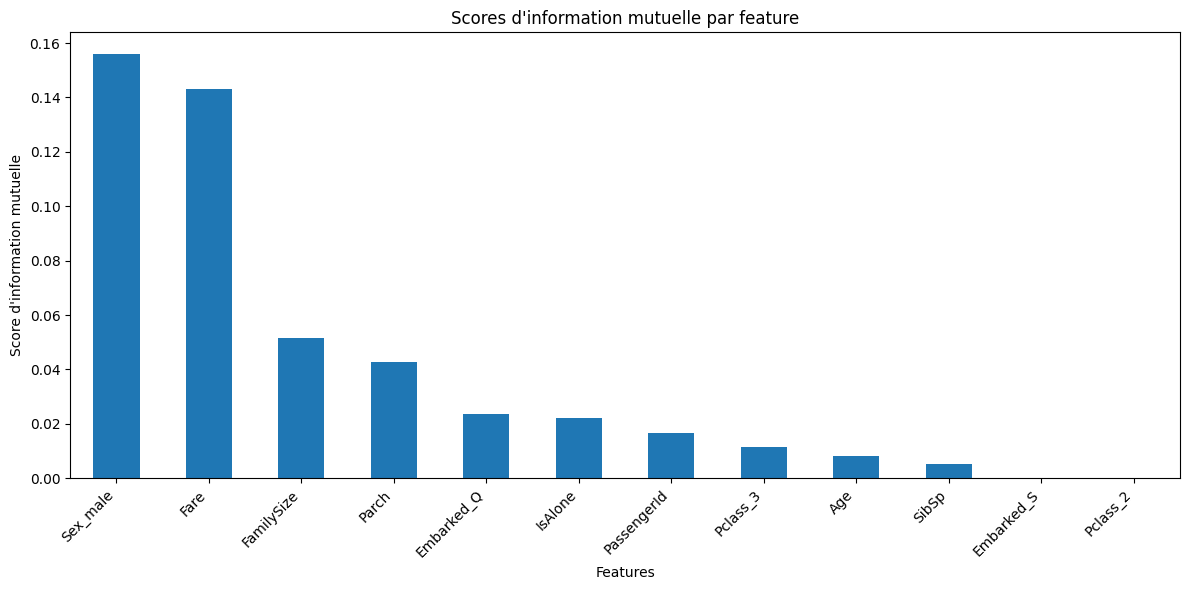

In [133]:
plt.figure(figsize=(12, 6))
mi_scores.plot(kind='bar')
plt.title("Scores d'information mutuelle par feature")
plt.xlabel("Features")
plt.ylabel("Score d'information mutuelle")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Question 1 : La variable Classe est-elle utile pour prévoir la survie ? Pourquoi ?
Oui, la variable 'Pclass' est utile pour prévoir la survie. Les scores d'information mutuelle montrent que 'Pclass' a un score non négligeable, ce qui indique une relation entre la classe et la survie. De plus, l'analyse du taux de survie par classe a clairement démontré que les passagers de première classe avaient un taux de survie significativement plus élevé que ceux des classes inférieures.


### Question 2 : Même question pour la variable Sex
Oui, la variable 'Sex' est très utile pour prévoir la survie. Les scores d'information mutuelle montrent que 'Sex_male' a le score le plus élevé, ce qui indique une forte relation entre le genre et la survie. De plus, l'analyse du taux de survie par genre et classe a montré une différence très marquée dans les taux de survie entre les hommes et les femmes, quel que soit la classe. Les femmes ont eu un taux de survie beaucoup plus élevé que les hommes.


### Question 3 : Comment traiter le variables liées à la famille du passager ?
D'après les scores d'information mutuelle et les visualisations, les caractéristiques créées FamilySize et IsAlone semblent être plus informatives sur la survie que les caractéristiques originales SibSp et Parch individuellement. Par conséquent, une bonne approche consiste à conserver les colonnes FamilySize et IsAlone et potentiellement supprimer les colonnes originales SibSp et Parch avant d'entraîner un modèle.




## 3. Traitement des données manquantes (à faire sur les données Train et Test)

3.1 La variable "Embarked" possède des valeurs nulles, compléter par la valeur majoritaire (S).

In [134]:
train['Embarked'] = train['Embarked'].fillna('S')

test['Embarked'] = test['Embarked'].fillna('S')

print("Valeurs manquantes après traitement de 'Embarked' dans train:")
print(train['Embarked'].isnull().sum())
print("\nValeurs manquantes après traitement de 'Embarked' dans test:")
print(test['Embarked'].isnull().sum())

Valeurs manquantes après traitement de 'Embarked' dans train:
0

Valeurs manquantes après traitement de 'Embarked' dans test:
0


3.2 Afficher l'influence du port d'embarquement sur la Survie

Taux de survie par port d'embarquement :
          Survival Rate (%)  Number of Passengers
Embarked                                         
C                 55.357143                   168
Q                 38.961039                    77
S                 33.900929                   646


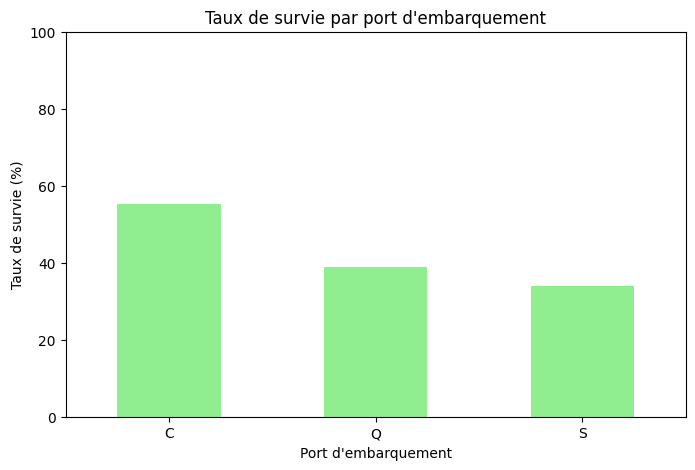

In [135]:
survival_by_embarked = train.groupby('Embarked')['Survived'].agg(['mean', 'count'])

survival_by_embarked['mean'] = survival_by_embarked['mean'] * 100

survival_by_embarked.rename(
    columns={'mean': 'Survival Rate (%)', 'count': 'Number of Passengers'},
    inplace=True
)

print("Taux de survie par port d'embarquement :")
print(survival_by_embarked)

plt.figure(figsize=(8, 5))
survival_by_embarked['Survival Rate (%)'].plot(kind='bar', color='lightgreen')
plt.title('Taux de survie par port d\'embarquement')
plt.xlabel('Port d\'embarquement')
plt.ylabel('Taux de survie (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.show()

3.3 La variable "Fare" (prix du ticket) possède des valeurs manquantes. Remplacer ces valeurs par la valeur médiane.

In [136]:
train['Fare'] = train['Fare'].fillna(train['Fare'].median())

test['Fare'] = test['Fare'].fillna(test['Fare'].median())

print("Valeurs manquantes après traitement de 'Fare' dans train:")
print(train['Fare'].isnull().sum())
print("\nValeurs manquantes après traitement de 'Fare' dans test:")
print(test['Fare'].isnull().sum())

Valeurs manquantes après traitement de 'Fare' dans train:
0

Valeurs manquantes après traitement de 'Fare' dans test:
0


3.4 Créer une variable CategoricalFare Découpant la valeur de ticket en 4 catégories de tailles à peu près égales.

In [137]:
train['CategoricalFare'] = pd.qcut(train['Fare'], 4, labels=False)

test['CategoricalFare'] = pd.qcut(test['Fare'], 4, labels=False)

print("Distribution des catégories de Fare dans train:")
print(train['CategoricalFare'].value_counts())

print("\nDistribution des catégories de Fare dans test:")
print(test['CategoricalFare'].value_counts())

Distribution des catégories de Fare dans train:
CategoricalFare
1    224
0    223
3    222
2    222
Name: count, dtype: int64

Distribution des catégories de Fare dans test:
CategoricalFare
0    114
3    105
2    102
1     97
Name: count, dtype: int64


3.5 Analyser l'effet de ces catégories de prix de ticket sur la survie.

Taux de survie par catégorie de prix de ticket :
                 Survival Rate (%)  Number of Passengers
CategoricalFare                                         
0                        19.730942                   223
1                        30.357143                   224
2                        45.495495                   222
3                        58.108108                   222


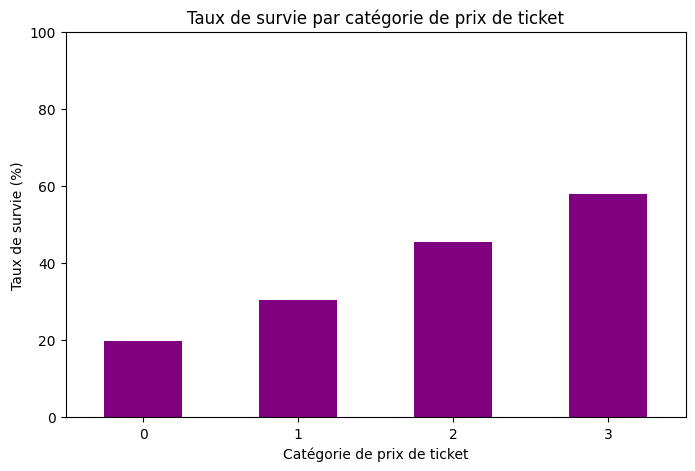

In [138]:
survival_by_fare_category = train.groupby('CategoricalFare')['Survived'].agg(['mean', 'count'])

survival_by_fare_category['mean'] = survival_by_fare_category['mean'] * 100

survival_by_fare_category.rename(
    columns={'mean': 'Survival Rate (%)', 'count': 'Number of Passengers'},
    inplace=True
)

print("Taux de survie par catégorie de prix de ticket :")
print(survival_by_fare_category)

plt.figure(figsize=(8, 5))
survival_by_fare_category['Survival Rate (%)'].plot(kind='bar', color='purple')
plt.title('Taux de survie par catégorie de prix de ticket')
plt.xlabel('Catégorie de prix de ticket')
plt.ylabel('Taux de survie (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.show()

3.6 Combien de valeurs d'Age manquent ? Complète par des valeurs entières aléatoires entre (moyenne - écart type) et (moyenne + écart type).

In [139]:
missing_age_train = train['Age'].isnull().sum()
missing_age_test = test['Age'].isnull().sum()

print(f"Nombre de valeurs d'Age manquantes dans train : {missing_age_train}")
print(f"Nombre de valeurs d'Age manquantes dans test : {missing_age_test}")

mean_age = train['Age'].mean()
std_age = train['Age'].std()

random_age_train = np.random.randint(mean_age - std_age, mean_age + std_age, size=missing_age_train)
random_age_test = np.random.randint(mean_age - std_age, mean_age + std_age, size=missing_age_test)

train.loc[train['Age'].isnull(), 'Age'] = random_age_train

test.loc[test['Age'].isnull(), 'Age'] = random_age_test

print("\nValeurs manquantes après traitement de 'Age' dans train:")
print(train['Age'].isnull().sum())
print("\nValeurs manquantes après traitement de 'Age' dans test:")
print(test['Age'].isnull().sum())

train['Age'] = train['Age'].astype(int)
test['Age'] = test['Age'].astype(int)

print("\nTypes de données après conversion de 'Age':")
print("Train Age dtype:", train['Age'].dtype)
print("Test Age dtype:", test['Age'].dtype)

Nombre de valeurs d'Age manquantes dans train : 177
Nombre de valeurs d'Age manquantes dans test : 86

Valeurs manquantes après traitement de 'Age' dans train:
0

Valeurs manquantes après traitement de 'Age' dans test:
0

Types de données après conversion de 'Age':
Train Age dtype: int64
Test Age dtype: int64


3.7 Créer une variable CategoricalAge Découpant la valeur d'age en 5 tranches d'age de même taille.

In [140]:
train['CategoricalAge'] = pd.qcut(train['Age'], 5, labels=False)

test['CategoricalAge'] = pd.qcut(test['Age'], 5, labels=False)

print("Distribution des catégories d'Age dans train:")
print(train['CategoricalAge'].value_counts().sort_index())

print("\nDistribution des catégories d'Age dans test:")
print(test['CategoricalAge'].value_counts().sort_index())

Distribution des catégories d'Age dans train:
CategoricalAge
0    183
1    181
2    196
3    169
4    162
Name: count, dtype: int64

Distribution des catégories d'Age dans test:
CategoricalAge
0    88
1    89
2    77
3    86
4    78
Name: count, dtype: int64


3.8 Analyser l'effet de ces catégories d'age sur la survie.

Taux de survie par catégorie d'âge :
                Survival Rate (%)  Number of Passengers
CategoricalAge                                         
0                       45.901639                   183
1                       30.939227                   181
2                       39.285714                   196
3                       37.278107                   169
4                       38.271605                   162


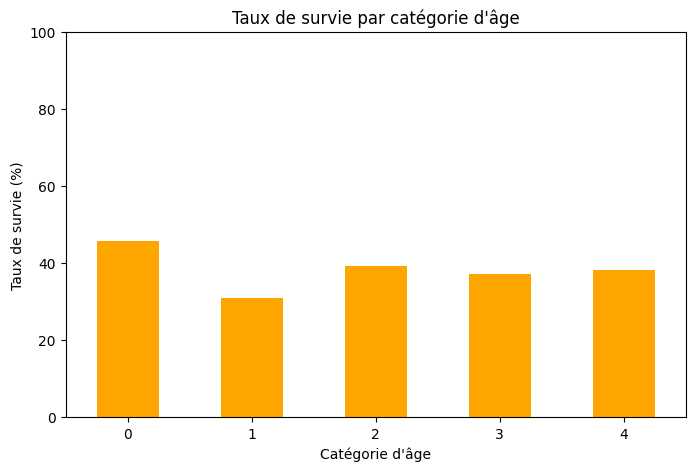

In [141]:
survival_by_age_category = train.groupby('CategoricalAge')['Survived'].agg(['mean', 'count'])

survival_by_age_category['mean'] = survival_by_age_category['mean'] * 100

survival_by_age_category.rename(
    columns={'mean': 'Survival Rate (%)', 'count': 'Number of Passengers'},
    inplace=True
)

print("Taux de survie par catégorie d'âge :")
print(survival_by_age_category)

plt.figure(figsize=(8, 5))
survival_by_age_category['Survival Rate (%)'].plot(kind='bar', color='orange')
plt.title('Taux de survie par catégorie d\'âge')
plt.xlabel('Catégorie d\'âge')
plt.ylabel('Taux de survie (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.show()

### Question 1 : Classer les variables par ordre d'intérêt

En se basant sur les scores d'information mutuelle, voici un classement possible des variables par ordre d'intérêt pour prédire la survie (du plus informatif au moins informatif) :

1 -- Sex_male : Score MI le plus élevé, indiquant une forte relation avec la survie.  
2 -- Fare : Score MI élevé, suggérant que le tarif est un bon prédicteur.  
3 -- FamilySize : Score MI modéré, indiquant que la taille de la famille est quelque peu informative.  
4 -- Parch : Score MI modéré, lié à la taille de la famille.  
5 -- Embarked_Q : Score MI plus faible, mais montre toujours une certaine relation.  
6 -- IsAlone : Score MI plus faible, mais également lié à la taille de la famille.  
7 -- PassengerId : Très faible score MI, attendu car il s'agit juste d'un identifiant.  
8 -- Pclass_3 : Faible score MI, indique une certaine relation avec la classe 3.  
9 -- Age : Très faible score MI dans cette analyse.  
10 -- SibSp : Très faible score MI, lié à la taille de la famille.  
11 -- Embarked_S : Score MI nul dans cette analyse.  
12 -- Pclass_2 : Score MI nul dans cette analyse.  

## 4 : Traitement de features complexes

4.1 : Le nom permet de retrouver le titre du passager. Trouver les titres lorsqu'ils existent.

In [142]:
train['Title'] = train['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

test['Title'] = test['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

print("Distribution des titres dans train:")
print(train['Title'].value_counts())

print("\nDistribution des titres dans test:")
print(test['Title'].value_counts())

Distribution des titres dans train:
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

Distribution des titres dans test:
Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64


4.2 : En utilisant la fonction pandas crosstab, afficher pour train le nombre d'occurences par titres (en ligne) et par sexe (en colonne)

In [143]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


4.3 :
Remplacer 'Melle et 'Ms' par 'Miss'

Remplacer 'Mme' par 'Mrs'

Creer une valeur "Rare" pour les autres titres avec moins de 10 occurences.

Calculer ensuite le taux de survie par titre

Distribution des titres après regroupement (train):
Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64

Distribution des titres après regroupement (test):
Title
Mr        240
Miss       79
Mrs        72
Master     21
Rare        5
Dona        1
Name: count, dtype: int64

Taux de survie par titre :
        Survival Rate (%)  Number of Passengers
Title                                          
Master          57.500000                    40
Miss            70.270270                   185
Mr              15.667311                   517
Mrs             79.365079                   126
Rare            34.782609                    23


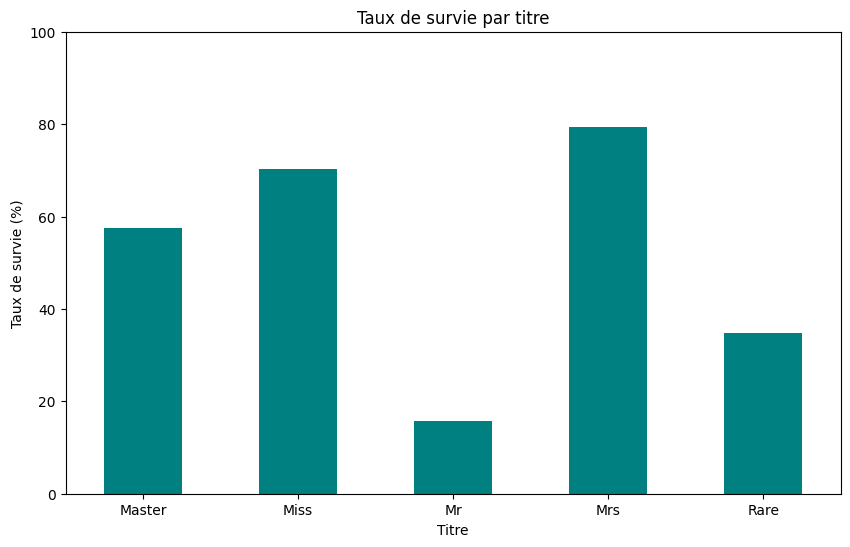

In [144]:
train['Title'] = train['Title'].replace(['Mlle', 'Ms'], 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

test['Title'] = test['Title'].replace(['Mlle', 'Ms'], 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

rare_titles = train['Title'].value_counts()[train['Title'].value_counts() < 10].index
train['Title'] = train['Title'].replace(rare_titles, 'Rare')

test['Title'] = test['Title'].replace(rare_titles, 'Rare')

print("Distribution des titres après regroupement (train):")
print(train['Title'].value_counts())

print("\nDistribution des titres après regroupement (test):")
print(test['Title'].value_counts())

survival_by_title = train.groupby('Title')['Survived'].agg(['mean', 'count'])

survival_by_title['mean'] = survival_by_title['mean'] * 100

survival_by_title.rename(
    columns={'mean': 'Survival Rate (%)', 'count': 'Number of Passengers'},
    inplace=True
)

print("\nTaux de survie par titre :")
print(survival_by_title)

plt.figure(figsize=(10, 6))
survival_by_title['Survival Rate (%)'].plot(kind='bar', color='teal')
plt.title('Taux de survie par titre')
plt.xlabel('Titre')
plt.ylabel('Taux de survie (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.show()

## 5. Mise en forme des données non numériques

5.1 Attribuer une valeur numérique au Genre. Par exemple 0 pour 'female' et 1 pour 'male'

In [145]:
train['Sex'] = train['Sex'].map({'female': 0, 'male': 1}).astype(int)

test['Sex'] = test['Sex'].map({'female': 0, 'male': 1}).fillna(-1).astype(int)

print("Valeurs uniques dans la colonne 'Sex' après encodage (train):")
print(train['Sex'].unique())
print("\nValeurs uniques dans la colonne 'Sex' après encodage (test):")
print(test['Sex'].unique())

Valeurs uniques dans la colonne 'Sex' après encodage (train):
[1 0]

Valeurs uniques dans la colonne 'Sex' après encodage (test):
[1 0]


5.2 : Attribuer une valeur pour les possibilités de la variable "Title" ('Master','Miss','Mr','Mrs','Rare')

In [146]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
train['Title'] = train['Title'].map(title_mapping)
test['Title'] = test['Title'].map(title_mapping)

print("Valeurs uniques dans la colonne 'Title' après encodage (train):")
print(train['Title'].unique())
print("\nValeurs uniques dans la colonne 'Title' après encodage (test):")
print(test['Title'].unique())

Valeurs uniques dans la colonne 'Title' après encodage (train):
[1 3 2 4 5]

Valeurs uniques dans la colonne 'Title' après encodage (test):
[ 1.  3.  2.  4.  5. nan]


5.3 Remplacer les titres manquant par 0, et attribuer à la colonne le type entier

In [147]:
train['Title'] = train['Title'].fillna(0)

test['Title'] = test['Title'].fillna(0)

train['Title'] = train['Title'].astype(int)
test['Title'] = test['Title'].astype(int)

print("Valeurs uniques dans la colonne 'Title' après imputation et conversion (train):")
print(train['Title'].unique())
print("\nValeurs uniques dans la colonne 'Title' après imputation et conversion (test):")
print(test['Title'].unique())

Valeurs uniques dans la colonne 'Title' après imputation et conversion (train):
[1 3 2 4 5]

Valeurs uniques dans la colonne 'Title' après imputation et conversion (test):
[1 3 2 4 5 0]


5.4 Attribuer une valeur numérique aux 4 catégories de la variable Fare

In [148]:
train['CategoricalFare'] = train['CategoricalFare'].astype(int)
test['CategoricalFare'] = test['CategoricalFare'].astype(int)

print("Types de données après conversion de 'CategoricalFare':")
print("Train CategoricalFare dtype:", train['CategoricalFare'].dtype)
print("Test CategoricalFare dtype:", test['CategoricalFare'].dtype)

Types de données après conversion de 'CategoricalFare':
Train CategoricalFare dtype: int64
Test CategoricalFare dtype: int64


5.5 Attibuer une valeur numérique au Port d'embarquement (Embarked)

In [149]:
train = pd.get_dummies(train, columns=['Embarked'], prefix='Embarked', drop_first=True)
test = pd.get_dummies(test, columns=['Embarked'], prefix='Embarked', drop_first=True)

print("Colonnes après encodage de 'Embarked' dans train:")
print(train.columns)
print("\nColonnes après encodage de 'Embarked' dans test:")
print(test.columns)

Colonnes après encodage de 'Embarked' dans train:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'FamilySize', 'IsAlone',
       'CategoricalFare', 'CategoricalAge', 'Title', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

Colonnes après encodage de 'Embarked' dans test:
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'FamilySize', 'IsAlone', 'CategoricalFare',
       'CategoricalAge', 'Title', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


5.6 Supprimer les features inutiles

In [150]:
train = train.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Fare', 'Age'], axis=1)
test = test.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Fare', 'Age'], axis=1)

print("Colonnes restantes dans train après suppression:")
print(train.columns)
print("\nColonnes restantes dans test après suppression:")
print(test.columns)

Colonnes restantes dans train après suppression:
Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'FamilySize', 'IsAlone',
       'CategoricalFare', 'CategoricalAge', 'Title', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

Colonnes restantes dans test après suppression:
Index(['PassengerId', 'Pclass', 'Sex', 'FamilySize', 'IsAlone',
       'CategoricalFare', 'CategoricalAge', 'Title', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')


5.7 Afficher les infos pour les deux datasets

In [151]:
print("=== Informations sur le DataFrame train après traitement ===")
train.info()
print("\n=== Informations sur le DataFrame test après traitement ===")
test.info()

=== Informations sur le DataFrame train après traitement ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   PassengerId      891 non-null    int64
 1   Survived         891 non-null    int64
 2   Pclass           891 non-null    int64
 3   Sex              891 non-null    int64
 4   FamilySize       891 non-null    int64
 5   IsAlone          891 non-null    int64
 6   CategoricalFare  891 non-null    int64
 7   CategoricalAge   891 non-null    int64
 8   Title            891 non-null    int64
 9   Embarked_Q       891 non-null    bool 
 10  Embarked_S       891 non-null    bool 
dtypes: bool(2), int64(9)
memory usage: 64.5 KB

=== Informations sur le DataFrame test après traitement ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
--- 

5.8 Sauver les deux datasets dans des fichier csv. Eviter d'écrire un index (n° de ligne)

In [152]:
train.to_csv('train_processed.csv', index=False)
test.to_csv('test_processed.csv', index=False)

print("Dataframes sauvegardés en 'train_processed.csv' et 'test_processed.csv'")

Dataframes sauvegardés en 'train_processed.csv' et 'test_processed.csv'
